PREPROCESSING

In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('Luas Panen, Produksi, dan Produktivitas Padi Menurut Provinsi, 2024 (1).csv', header=None)
df.drop(index=[0, 1, 3], inplace=True)
df.reset_index(drop=True, inplace=True)
df.columns = ['Nama_Provinsi', 'Luas Panen (ha)', 'Produktivitas (ku/ha)', 'Produksi (ton)']
df.replace('-', np.nan, inplace=True)
df.dropna(inplace=True)
df.to_csv('Luas Panen, Produksi, dan Produktivitas Padi Menurut Provinsi, 2024 (1)_praprocessing.csv', index=False)
print(df.isnull().sum())
print(df.head())



Nama_Provinsi            0
Luas Panen (ha)          0
Produktivitas (ku/ha)    0
Produksi (ton)           0
dtype: int64
  Nama_Provinsi Luas Panen (ha) Produktivitas (ku/ha) Produksi (ton)
0       LAMPUNG       531715.12                  52.5     2791347.53
1     KEP. RIAU          113.33                 26.92         305.09
2   DKI JAKARTA          498.31                 46.29        2306.54
3    JAWA BARAT      1475362.09                 58.47     8626879.91
4   JAWA TENGAH      1554777.14                 57.19     8891297.05


Normalisasi

In [53]:

for col in ['Luas Panen (ha)', 'Produktivitas (ku/ha)', 'Produksi (ton)']:
    df[col] = pd.to_numeric(df[col], errors='coerce')
df.dropna(subset=['Luas Panen (ha)', 'Produktivitas (ku/ha)', 'Produksi (ton)'], inplace=True)
for col in ['Luas Panen (ha)', 'Produktivitas (ku/ha)', 'Produksi (ton)']:
    min_val = df[col].min()
    max_val = df[col].max()
    df[col] = (df[col] - min_val) / (max_val - min_val)

print(df.head())


  Nama_Provinsi  Luas Panen (ha)  Produktivitas (ku/ha)  Produksi (ton)
1       LAMPUNG         0.328827               0.745773        0.301099
2     KEP. RIAU         0.000064               0.000000        0.000028
3   DKI JAKARTA         0.000302               0.564723        0.000244
4    JAWA BARAT         0.912415               0.919825        0.930579
5   JAWA TENGAH         0.961528               0.882507        0.959102


Model

In [40]:
import pandas as pd
import numpy as np
import random


data = df[['Luas Panen (ha)', 'Produktivitas (ku/ha)', 'Produksi (ton)']].values
k = 2
max_iter = 200
medoid_indices = random.sample(range(len(data)), k)
medoids = data[medoid_indices]

for iteration in range(max_iter):
    clusters = {i: [] for i in range(k)}
    for idx, point in enumerate(data):
        distances = [np.linalg.norm(point - medoid) for medoid in medoids]
        cluster_id = np.argmin(distances)
        clusters[cluster_id].append(idx)
    new_medoids = []
    for cluster_id, indices in clusters.items():
        cluster_points = data[indices]
        min_total_distance = float('inf')
        best_medoid = None
        for i in range(len(cluster_points)):
            candidate = cluster_points[i]
            total_distance = np.sum([np.linalg.norm(candidate - other) for other in cluster_points])
            if total_distance < min_total_distance:
                min_total_distance = total_distance
                best_medoid = candidate
        new_medoids.append(best_medoid)
    new_medoids = np.array(new_medoids)
    if np.allclose(medoids, new_medoids):
        print(f'Konvergen di iterasi ke-{iteration+1}')
        break
    medoids = new_medoids
labels = np.empty(len(data), dtype=int)
for cluster_id, indices in clusters.items():
    for i in indices:
        labels[i] = cluster_id
df['Cluster'] = labels
print(df[['Nama_Provinsi', 'Cluster']])


Konvergen di iterasi ke-2
          Nama_Provinsi  Cluster
0               LAMPUNG        0
1             KEP. RIAU        1
2           DKI JAKARTA        1
3            JAWA BARAT        0
4           JAWA TENGAH        0
5         DI YOGYAKARTA        1
6            JAWA TIMUR        0
7                BANTEN        0
8                  BALI        0
9   NUSA TENGGARA BARAT        0
10  NUSA TENGGARA TIMUR        1
11     KALIMANTAN BARAT        1
12    KALIMANTAN TENGAH        1
13   KALIMANTAN SELATAN        1
14     KALIMANTAN TIMUR        1
15     KALIMANTAN UTARA        1
16       SULAWESI UTARA        1
17      SULAWESI TENGAH        1
18     SULAWESI SELATAN        0
19    SULAWESI TENGGARA        1
20            GORONTALO        0
21       SULAWESI BARAT        0
22               MALUKU        1
23         MALUKU UTARA        1
24          PAPUA BARAT        1
25     PAPUA BARAT DAYA        1
26                PAPUA        1
27        PAPUA SELATAN        1
28         PAPUA 

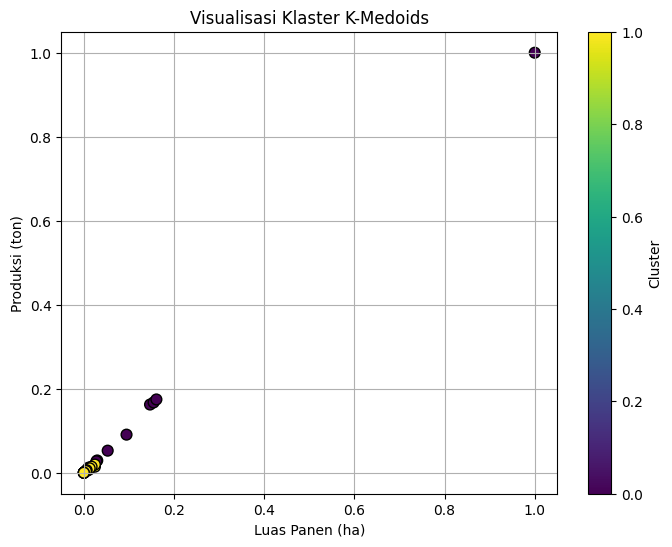

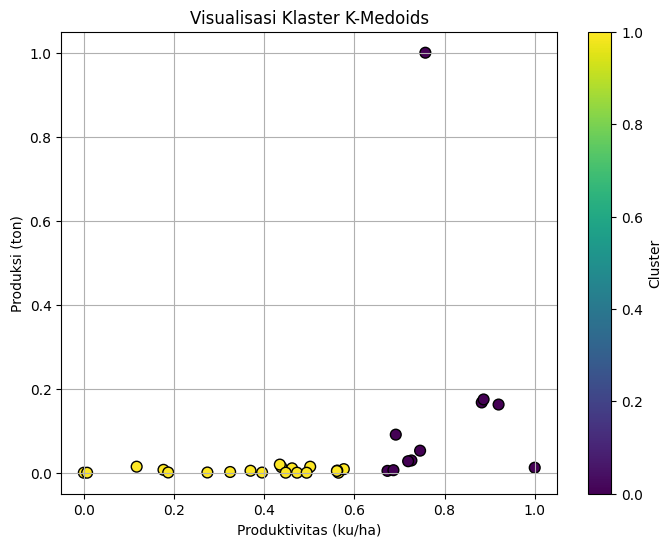

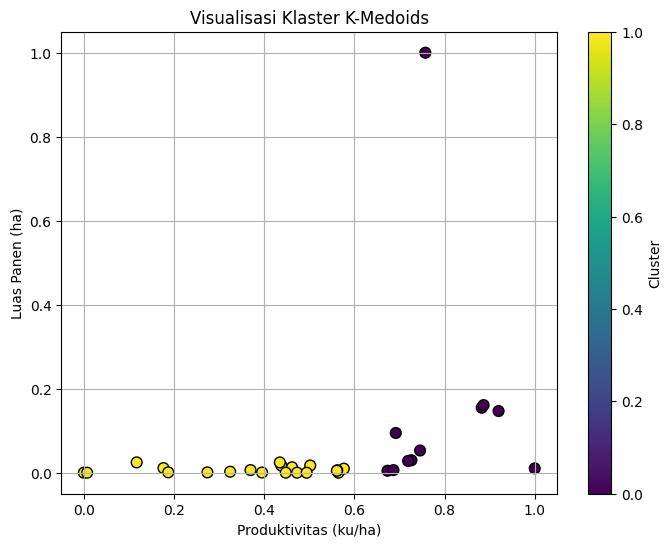

In [41]:
import matplotlib.pyplot as plt

x = df['Luas Panen (ha)']
y = df['Produksi (ton)']
labels = df['Cluster']
plt.figure(figsize=(8, 6))
scatter = plt.scatter(x, y, c=labels, cmap='viridis', s=60, edgecolors='k')
plt.xlabel('Luas Panen (ha)')
plt.ylabel('Produksi (ton)')
plt.title('Visualisasi Klaster K-Medoids')
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.show()

x1 = df[ 'Produktivitas (ku/ha)']
y1 = df['Produksi (ton)']
labels = df['Cluster']
plt.figure(figsize=(8, 6))
scatter = plt.scatter(x1, y1, c=labels, cmap='viridis', s=60, edgecolors='k')
plt.xlabel( 'Produktivitas (ku/ha)')
plt.ylabel('Produksi (ton)')
plt.title('Visualisasi Klaster K-Medoids')
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.show()

x3 = df['Produktivitas (ku/ha)']
y3 = df['Luas Panen (ha)']
labels = df['Cluster']
plt.figure(figsize=(8, 6))
scatter = plt.scatter(x3, y3, c=labels, cmap='viridis', s=60, edgecolors='k')
plt.xlabel( 'Produktivitas (ku/ha)')
plt.ylabel('Luas Panen (ha)')
plt.title('Visualisasi Klaster K-Medoids')
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.show()

In [42]:
import numpy as np

n = len(data)
unique_clusters = set(labels)
silhouette_scores = [[] for _ in unique_clusters]

for i in range(n):
    point_i = data[i]
    label_i = labels[i]


    same_cluster = [j for j in range(n) if labels[j] == label_i and j != i]
    if same_cluster:
        a_i = np.mean([np.linalg.norm(point_i - data[j]) for j in same_cluster])
    else:
        a_i = 0
    b_i_list = []
    for label_j in unique_clusters:
        if label_j == label_i:
            continue
        other_cluster = [j for j in range(n) if labels[j] == label_j]
        b = np.mean([np.linalg.norm(point_i - data[j]) for j in other_cluster])
        b_i_list.append(b)
    b_i = min(b_i_list) if b_i_list else 0
    if max(a_i, b_i) == 0:
        s_i = 0
    else:
        s_i = (b_i - a_i) / max(a_i, b_i)
    silhouette_scores[label_i].append(s_i)
for cluster_id, scores in enumerate(silhouette_scores):
    if scores:
        mean_score = np.mean(scores)
        print(f"Cluster {cluster_id}: Silhouette = {mean_score:.4f}, Jumlah Anggota = {len(scores)}")
    else:
        print(f"Cluster {cluster_id}: Tidak ada anggota (kosong)")


Cluster 0: Silhouette = 0.2715, Jumlah Anggota = 11
Cluster 1: Silhouette = 0.6024, Jumlah Anggota = 20


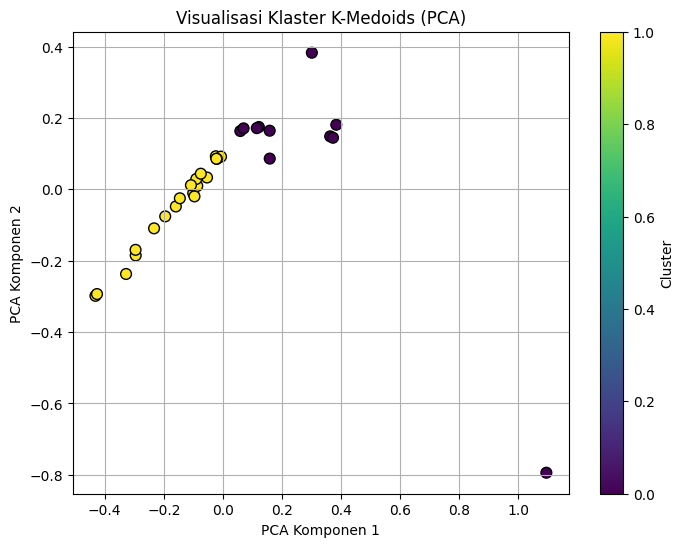

In [43]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt


fitur = df[['Luas Panen (ha)', 'Produktivitas (ku/ha)', 'Produksi (ton)']].values
pca = PCA(n_components=2)
data_pca = pca.fit_transform(fitur)
plt.figure(figsize=(8, 6))
scatter = plt.scatter(data_pca[:, 0], data_pca[:, 1], c=df['Cluster'], cmap='viridis', s=60, edgecolors='k')

plt.xlabel('PCA Komponen 1')
plt.ylabel('PCA Komponen 2')
plt.title('Visualisasi Klaster K-Medoids (PCA)')
plt.colorbar(scatter, label='Cluster')
plt.grid(True)
plt.show()
